In [27]:
# Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

from sklearn.preprocessing import StandardScaler
#from sklearn.preprocessing import scale
#from sklearn.neighbors import KNeighborsClassifier
#from sklearn.tree import DecisionTreeClassifier
#from sklearn import svm
#from sklearn.model_selection import train_test_split
#from sklearn import preprocessing
#from sklearn import metrics
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
#import scipy
#from scipy.spatial.distance import pdist
#import scipy.cluster.hierarchy as sch
#
##import xgboost as xgb
#from sklearn.metrics import confusion_matrix, classification_report, f1_score, precision_score
from matplotlib.pyplot import figure

#from sklearn.model_selection import cross_validate
#from sklearn.metrics import balanced_accuracy_score

import warnings


warnings.filterwarnings('ignore')

%matplotlib inline

# Loading Dataset

In [28]:
#Import df
merged_df = pd.read_pickle("merged_df.pkl")

target_cols = ['cooler_condition', 'valve_condition', 'pump_leakage', 
               'hydraulic_accumulator', 'stable_flag']

feature_df = merged_df[[col for col in merged_df.columns if col not in target_cols]]
target_df = merged_df[target_cols]

In [29]:
corr_groups = []

for col in feature_df.columns:
    list = feature_df.columns[((feature_df.corr()[col]>=.9) | (feature_df.corr()[col]<= -.9)).values].tolist()
    #print(list)
    if list not in corr_groups:
        corr_groups.append(list)

In [30]:
feature_df = feature_df.drop(columns="ce")

In [31]:
for group in corr_groups:
    #print(group)
    if len(group) == 1:
        print(f"single values without correlatin features {group}")

single values without correlatin features ['eps1']
single values without correlatin features ['ps4']


# PCA (principal component analysis)

In [80]:
target_feature = target_df.valve_condition

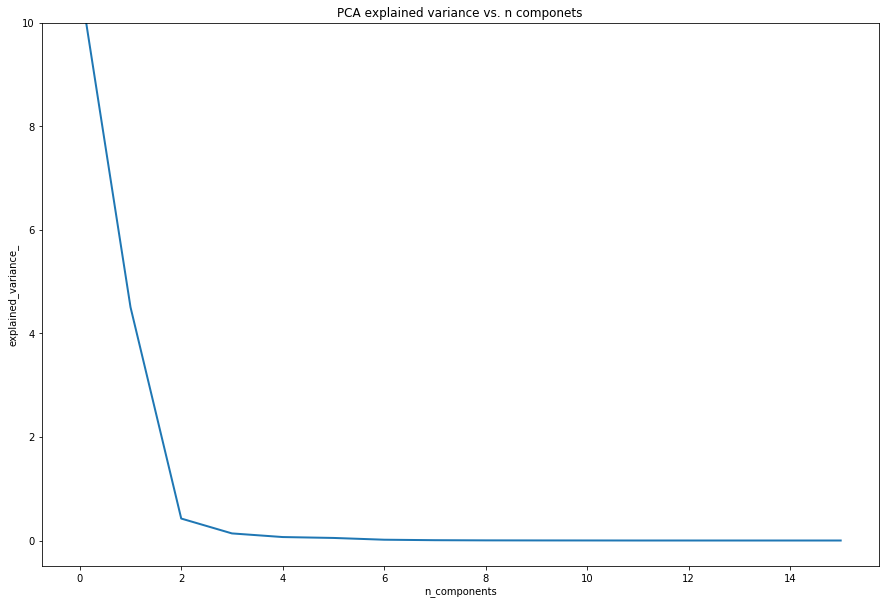

In [100]:
from sklearn.decomposition import PCA

feature_df_normalized = StandardScaler().fit_transform(feature_df) 
pca = PCA(n_components=len(feature_df.columns), svd_solver='full', iterated_power=20)
pca.fit(feature_df_normalized, target_feature)

plt.figure(figsize=(15, 10))
plt.plot(pca.explained_variance_, linewidth=2)
plt.axis('tight')
plt.xlabel('n_components')
plt.ylabel('explained_variance_')
plt.ylim(-0.5, 10)
plt.title('PCA explained variance vs. n componets');

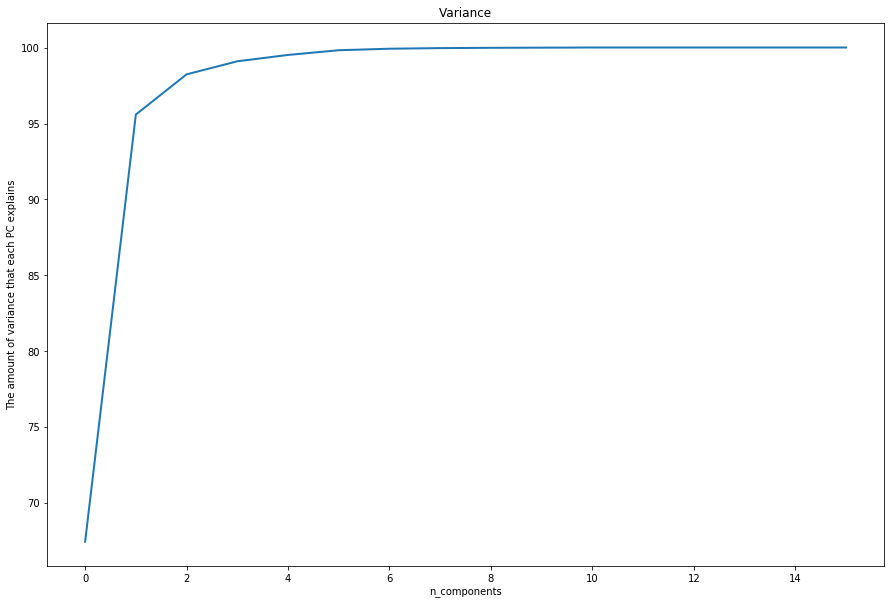

In [101]:
from matplotlib.pyplot import figure

var= pca.explained_variance_ratio_
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

plt.figure(figsize=(15, 10))
plt.plot(var1, linewidth=2)
plt.axis('tight')
plt.xlabel('n_components')
plt.ylabel('The amount of variance that each PC explains')
plt.title('Variance');

In [83]:
print(pca.explained_variance_ratio_)
print(pca.singular_values_)

[6.74389316e-01 2.81598968e-01 2.64974600e-02 8.55787876e-03
 4.17388373e-03 3.09855109e-03 9.57921873e-04 3.80731409e-04
 1.72070251e-04 9.85861828e-05 5.45056301e-05 1.15880564e-05
 5.65176290e-06 2.55024772e-06 2.51567462e-07 8.53717016e-08]
[1.54248031e+02 9.96735250e+01 3.05749962e+01 1.73759018e+01
 1.21348514e+01 1.04554714e+01 5.81338831e+00 3.66499715e+00
 2.46386656e+00 1.86497199e+00 1.38670784e+00 6.39395520e-01
 4.46535771e-01 2.99954562e-01 9.42088110e-02 5.48809041e-02]


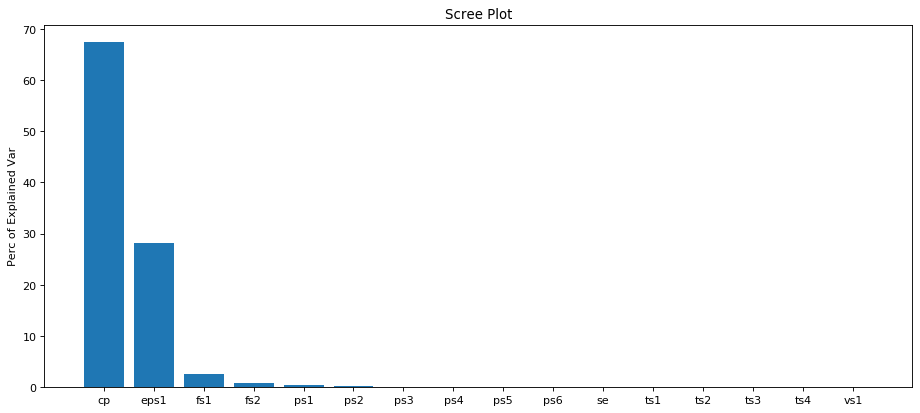

In [102]:
per_var = np.round(pca.explained_variance_ratio_*100, decimals=1)
labels = [str(x) for x in feature_df.columns]

figure(num=None, figsize=(14, 6), dpi=80, facecolor='w', edgecolor='k')
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel("Perc of Explained Var")
plt.title("Scree Plot")
plt.show()

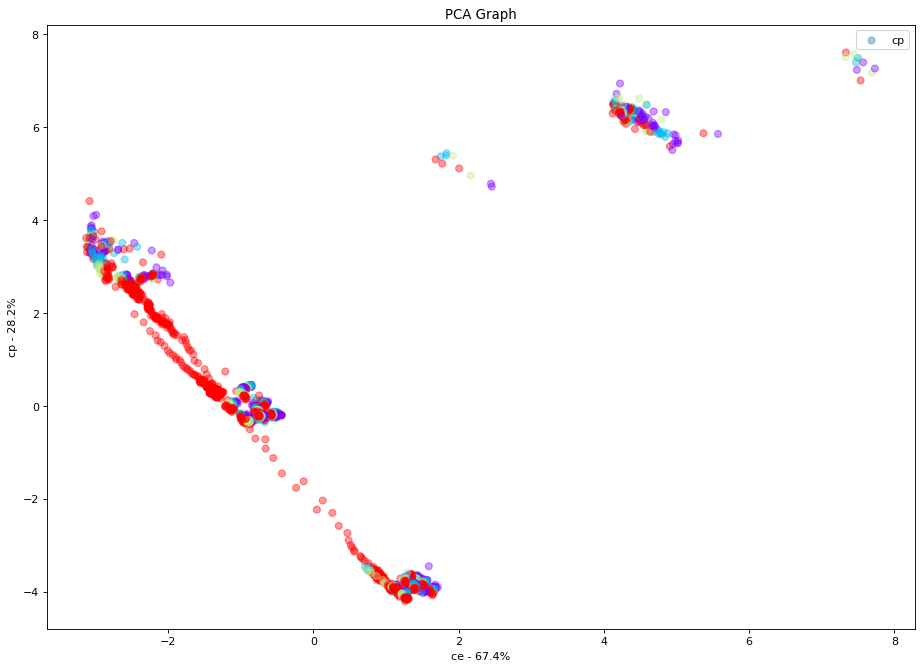

In [104]:
# PCA with 4 features

n_components = 4

pca = PCA(n_components=n_components, svd_solver='full', iterated_power=20) #iterated_power='auto'
pca.fit(feature_df_normalized, target_feature)


labels = [str(x) for x in feature_df.columns]
pca_data = pca.transform(feature_df_normalized)

pca_df = pd.DataFrame(pca_data, columns=labels[:n_components])
fig = plt.figure(num=None, figsize=(14, 10), dpi=80, facecolor='w', edgecolor='k')


ax = plt.scatter(pca_df.eps1, pca_df.cp, c=y, alpha=.4, cmap='rainbow', s=40) 

plt.title("PCA Graph")
plt.xlabel("ce - {0}%".format(per_var[0]))
plt.ylabel("cp - {0}%".format(per_var[1]))
plt.legend(labels)
plt.show();

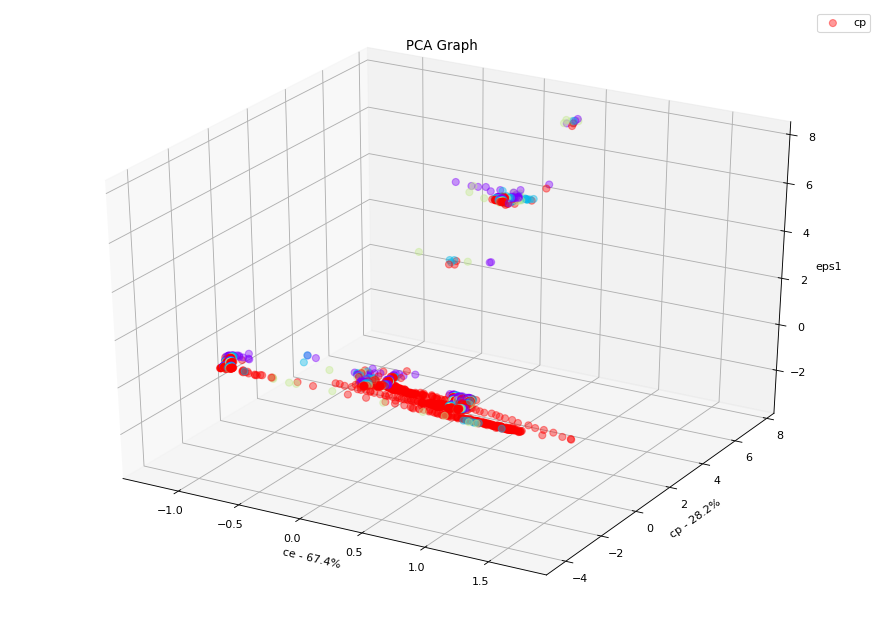

In [68]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(num=None, figsize=(14, 10), dpi=80, facecolor='w', edgecolor='k')
labels = [str(x) for x in pca_df.columns]

ax = fig.add_subplot(111, projection='3d')

xs = pca_df.fs1
ys = pca_df.cp
zs = pca_df.eps1
ax.scatter(xs, ys, zs, c=y, cmap='rainbow', alpha=.4, s=40)#, marker=m)c=y, 

plt.title("PCA Graph")
plt.xlabel("ce - {0}%".format(per_var[0]))
plt.ylabel("cp - {0}%".format(per_var[1]))
ax.set_zlabel("eps1")

ax.legend(labels)

plt.show();

In [108]:
loading_scores = pd.Series(pca.components_[0]) #index=
sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)

top_10 = sorted_loading_scores[0:100].index.values
#print(loading_scores[top_10])

# LinearDiscriminantAnalysis

In [109]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
X = feature_df
y = target_feature
clf = LinearDiscriminantAnalysis(solver="svd", shrinkage=None)

clf.fit(X, y)
X_lda = clf.fit_transform(X, y)
#print(clf.predict([[-0.8, -1]]))

In [110]:
#variance explained by each component.
clf.explained_variance_ratio_

array([9.94572526e-01, 5.06039608e-03, 3.67077694e-04])

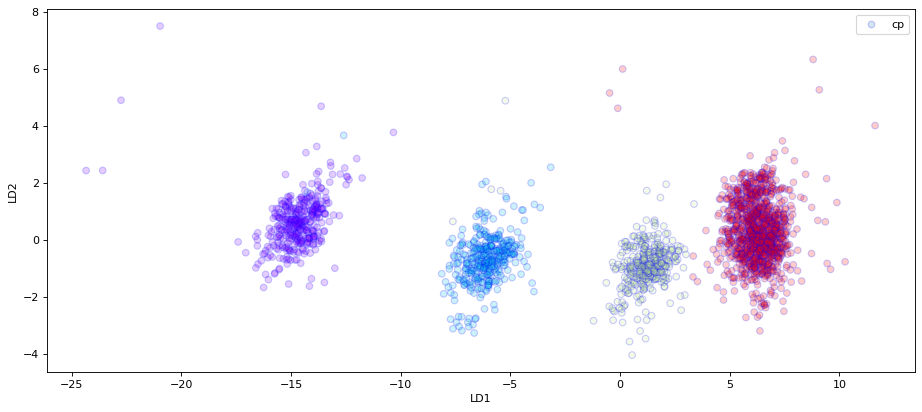

In [111]:
figure(num=None, figsize=(14, 6), dpi=80, facecolor='w', edgecolor='k')
labels = [str(x) for x in feature_df.columns]

plt.xlabel('LD1')
plt.ylabel('LD2')
plt.scatter(
    X_lda[:,0],
    X_lda[:,1],
    c=y,
    cmap='rainbow',
    alpha=0.2,
    edgecolors='b',
    )
plt.legend(labels);